<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Sean Nicolás González Vázquez y Doris Gomez Contreras.

**Fecha:** 15 de octubre del 2020.

**Expediente** : 720083, 713897.
**Profesor:** Oscar David Jaramillo Zuluaga.

# Tarea 8.

### El link donde se evidencia el trabajo es el siguiente: [GitHub Repositorio](https://github.com/nicoglez/Tareas_SNGonzalez_DGomez)

## Enunciado de tarea 

> **Ejercicio.**   


Considerar la funcion de distribucion de probabilidad cuya funcion de densidad es:
    
$$f(x)=\begin{cases}\frac{1}{x^2}, 1 \leq x \\ 0, otherwise\end{cases}$$ 
  
El problema es hacer un experimento simulado, con la ayuda de tecnicas de reduccion de varianza, para estimar la medida de la distribucion, para proveer una comparacion estandar, deriva la media analiticamente.
Para cada uno de los casos, obten 10 numeros aleatorios, para generar variables aleatorias y calcular una media estimada
- a) Usa Montecarlo crudo
- b) Usa Muestreo estratificado de 0 <= F(x) <= 0.6, 0.6 <= F(x) <= 0.9 y 0.9 <= F(x) <= 1, con 3,3 y 4 variables aleatorias cada una.
- c) Usa el metodo igualmente espaciado
- d) usar numeros complementarios

In [11]:
# importacion de librerias

import numpy as np
from functools import reduce
import time
import matplotlib.pyplot as plt
import scipy.stats as st     # Librería estadística
import pandas as pd
from scipy import optimize

# Solucion de los Ejercicios


> **Ejercicio.**   


Considerar la funcion de distribucion de probabilidad cuya funcion de densidad es:
    
$$f(x)=\begin{cases}\frac{1}{x^2}, 1 \leq x \\ 0, otherwise\end{cases}$$ 
  
El problema es hacer un experimento simulado, con la ayuda de tecnicas de reduccion de varianza, para estimar la medida de la distribucion, para proveer una comparacion estandar, deriva la media analiticamente.
Para cada uno de los casos, obten 10 numeros aleatorios, para generar variables aleatorias y calcular una media estimada
- a) Usa Montecarlo crudo
- b) Usa Muestreo estratificado de 0 <= F(x) <= 0.6, 0.6 <= F(x) <= 0.9 y 0.9 <= F(x) <= 1, con 3,3 y 4 variables aleatorias cada una.
- c) Usa el metodo igualmente espaciado
- d) usar numeros complementarios

### Solucion Nicolas

Escribir funciones a utilizar

- Encontrar la esperanza analitica

$$E(x) = \int_{1}^{\infty}x\frac{1}{x^2}dx$$
$$E(x) = [ln(x)]_{1}^{\infty} = ln(\infty) = \infty$$

Esto quiere decir que la media de la distribucion sera siempre infinita, el valor siempre sera diferente.

- Aplicar metodo de la transformada inversa

$$F(x) = \int_{1}^{x} \frac{1}{x^2}dx = [-\frac{1}{x}]_{1}^{x} = 1 - \frac{1}{x} $$
$$U = 1 - \frac{1}{x}$$
$$x = \frac{1}{1-U}$$

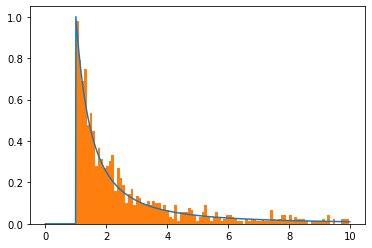

In [12]:
# probar que el metodo se consiguio de la forma correcta
f_x = lambda x: 1/x**2 if x>=1 else 0
f_inv = lambda u: 1/(1-u)

x = np.arange(0,10,0.01)
N = 1000
var_aleatorias = f_inv(np.random.uniform(0,0.9,N))

plt.figure()
plt.plot(x, [f_x(xi) for xi in x])
plt.hist(var_aleatorias, density = True, bins = 100)
plt.show()


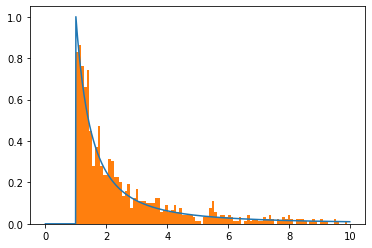

In [13]:
# Metodo acep rechazo
N = 1000
f_x = lambda x: 1/x**2 if x>=1 else 0


# Función de aceptación y rechazo usando una constante para t(x)
def acep_rechazo_simplificada(
    N:'Cantidad de variables a generar',
    Dom_f:'Dominio de la función f como tupla (a,b)',
    f:'función objetivo a generar',
    max_f:'máximo valor de f',
    distribucion_discreta: 'True or False'
    '''
    Funcion de aceptacion rechazo que devuelve N variables aleatorias
    '''
    
):
    X = np.zeros(N)
    i = 0
    while i < N:
        R2 = np.random.uniform(0,max_f)
        if distribucion_discreta:
            R1 = np.random.randint(Dom_f[0],Dom_f[1])
        else:
            R1 = np.random.uniform(Dom_f[0],Dom_f[1])
        if R2 <= f(R1):
            X[i] = R1
            i += 1
    return X

var_aleatorias2 = acep_rechazo_simplificada(N,(1,10),f_x, 1,False)

plt.figure()
plt.plot(x, [f_x(xi) for xi in x])
plt.hist(var_aleatorias2, density = True, bins = 100)
plt.show()

## a) Montecarlo

In [26]:
N=10
var_aleatorias = f_inv(np.random.uniform(0,1,N))

print('La media de la funcion usando montecarlo crudo es de', var_aleatorias.mean())


La media de la funcion usando montecarlo crudo es de 3.022792189618679


### b) Muestreo Estratificado 

In [27]:
def estratificado(N:'Numero de terminos', f_in: 'Funcion Inversa'):
    '''
    Funcion que hace el metodo de muestreo estratificado, devuelve variables aleatorias evaluadas en fin
    '''
    u1 = np.random.uniform(0,0.6,int(N*0.30))
    u2 = np.random.uniform(0.6,0.9,int(N*0.30))
    u3 = np.random.uniform(0.9,1,int(N*0.40))
    r = [u1,u2,u3]
    w = [(0.30/0.6),(0.30/0.3),(0.40/0.1)]
    xi = list(map(lambda r, wi: f_in(r)/ wi, r, w))
    return np.concatenate(xi)

N = 10
print('La media de la funcion usando metodo estratificado con diferentes espacios', estratificado(N, f_inv).mean())

La media de la funcion usando metodo estratificado con diferentes espacios 9.878730425708989


### c) Muestreo Estratificado igualmente espaciado

In [31]:
N = 10
def estra_igualmente_espaciado(B: 'Numero de terminos'):
    """
    Funcion que devuelve variables aleatorias estratificadas igualmente espaciadas
    """
    U2 = np.random.rand(B)
    i = np.arange(0,B)
    estra = (U2+i)/B
    return estra

rand = estra_igualmente_espaciado(N)

print('La media de la funcion usando metodo estratificado igualmente espaciado', (f_inv(rand)).mean())

La media de la funcion usando metodo estratificado igualmente espaciado 5.138225940667958


### d) Numeros complementarios 

In [33]:
U = np.random.rand(int(N/2))
U2 = 1-U

print('La media de la funcion usando numeros complementarios', (f_inv(U).mean() + f_inv(U2).mean())/2)

La media de la funcion usando numeros complementarios 22.411538972136555


### Solucion Doris

Para encontrar la media analítica primero sacamos la Esperanza y posterior mente tenemos dos opciones para generar números aleatorios, con el método de aceptación y rechazo o con el método de la transformada inversa.

$$E(x) = \int_{1}^{\infty}x\frac{1}{x^2}dx = [ln(x)]_{1}^{\infty} = ln(\infty) - ln(1) = ln(\infty) = \infty$$

Usaremos el segundo método, el de la transformada inversa:


$$F(x) = \int_{1}^{x} \frac{1}{x^2}dx = -\frac{1}{x}|_{1}^{x} = - \frac{1}{x} + 1  $$

lo igualamos a U

$$U = - \frac{1}{x} +1 $$
Despejamos para x

$$\frac{1}{x} =1-U$$

$$x = \frac{1}{1-U}$$


Ahora con eso generamos variables aleatorias que distribuyen igual que f(x).

In [34]:
#CLASE16
f_x = lambda x: 1/x**2 if x>=1 else 0
f_inv = lambda u: 1/(1-u)

x = np.arange(0,10,0.01)
N = 1000
v_a = f_inv(np.random.uniform(0,0.9,N))
v_a

array([1.61327099, 1.64796042, 2.4399484 , 1.5005623 , 5.10793044,
       2.81181295, 1.60119875, 1.28794463, 2.97882781, 1.60270921,
       2.38392056, 1.68446109, 2.18104587, 7.21323033, 3.38583716,
       3.67461654, 1.04962487, 4.82604063, 2.14137533, 1.17005871,
       1.78981561, 1.58607226, 1.29618028, 2.80000289, 4.57546137,
       2.12426753, 6.20819042, 2.65157827, 2.93860591, 1.03296535,
       5.24921585, 1.0931874 , 1.25346246, 5.96725238, 1.42608369,
       1.34969776, 3.93364185, 1.09813546, 3.48487801, 1.02083463,
       1.089722  , 7.59701058, 2.66975034, 1.10490395, 1.16885395,
       1.21542164, 2.39269279, 1.29628708, 1.03850672, 4.37596882,
       1.82434201, 1.8349588 , 2.79790935, 2.73994598, 1.49718357,
       1.57455308, 2.4964992 , 3.82886987, 1.64308568, 1.27372093,
       4.58067934, 3.13442502, 3.68530008, 1.37832598, 3.21840183,
       1.94146745, 3.34873898, 1.29755118, 2.67041341, 2.29739206,
       9.82927627, 5.04386092, 1.12401382, 1.09173032, 2.87906

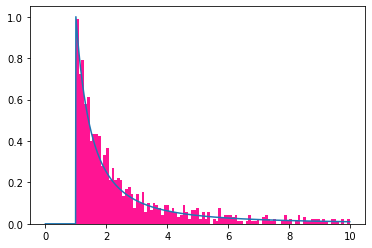

In [35]:
N = 1000
f_x = lambda x: 1/x**2 if x>=1 else 0

def acep_rechazo_simplificada(
    N:'Cantidad de variables a generar',
    Dom_f:'Dominio de la función f como tupla (a,b)',
    f:'función objetivo a generar',
    max_f:'máximo valor de f',
    distribucion_discreta: 'True or False'
):
    X = np.zeros(N)
    i = 0
    while i < N:
        R2 = np.random.uniform(0,max_f)
        if distribucion_discreta:
            R1 = np.random.randint(Dom_f[0],Dom_f[1])
        else:
            R1 = np.random.uniform(Dom_f[0],Dom_f[1])
        if R2 <= f(R1):
            X[i] = R1
            i += 1####revisar que no haga ciclo
    return X

v_a2 = acep_rechazo_simplificada(N,(1,10),f_x, 1,False)

plt.figure()
plt.plot(x, [f_x(xi) for xi in x])
plt.hist(v_a2,color="deeppink" ,density = True, bins = 100)
plt.show()

In [36]:
N_TODOS= 10

In [37]:
var_ale_MONTE = f_inv(np.random.uniform(0,1,N_TODOS))
var_ale_MONTE.mean(),print('inciso A')

inciso A


(2.9204321302531198, None)

In [41]:
def estratif(N, f_in):
    u1 = np.random.uniform(0,0.6,int(N*0.30))
    u2 = np.random.uniform(0.6,0.9,int(N*0.30))
    u3 = np.random.uniform(0.9,1,int(N*0.40))##CAMBIAAAA
    r = [u1,u2,u3]
    w = [(0.30/0.6),(0.30/0.3),(0.40/0.1)]
    xi = list(map(lambda r, wi: f_in(r)/ wi, r, w))
    return np.concatenate(xi)


estratif(N_TODOS, f_inv).mean(),print('inciso B')

inciso B


(3.9321053803171737, None)

In [39]:
def E_igualmente_espaciado(B):
    U2 = np.random.rand(B)
    i = np.arange(0,B)
    estra = (U2+i)/B
    return estra

RR = E_igualmente_espaciado(N_TODOS)

(f_inv(RR)).mean(),print('inciso C')

inciso C


(11.61899352174395, None)

In [40]:
U = np.random.rand(int(N_TODOS/2))
U2 = 1-U

(f_inv(U).mean() + f_inv(U2).mean())/2,print('inciso D')

inciso D


(3.510918587610276, None)